In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 9.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import os

def convert_to_yolo_format(image_width, image_height, annotations):
    yolo_annotations = []
    for ann in annotations:
        class_id, x_min, y_min, x_max, y_max = ann
        center_x = (x_min + x_max) / 2 / image_width
        center_y = (y_min + y_max) / 2 / image_height
        width = (x_max - x_min) / image_width
        height = (y_max - y_min) / image_height
        yolo_annotations.append(f"{class_id} {center_x} {center_y} {width} {height}")
    return yolo_annotations

# Example annotations
annotations = [
    [0, 50, 50, 200, 200]  # [class_id, x_min, y_min, x_max, y_max]
]

# Convert to YOLO format
image_width = 640
image_height = 480
yolo_format = convert_to_yolo_format(image_width, image_height, annotations)

# Save to a text file
with open('drive/MyDrive/plant_disease_detection/dataset/annotation.txt', 'w') as f:
    for line in yolo_format:
        f.write(line + '\n')

In [4]:
# Run only if you want to train the model

import torch
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model
# Train the model
model.train(data="drive/MyDrive/plant_disease_detection/colab_notebooks/configs/yolo_v8_config.yaml", epochs=10, imgsz=640)  # Adjust epochs and image size as needed

# Evaluate the model on the validation set
metrics = model.val()
print(metrics)


# Export the model to pt format
path = model.export(format="pt", save_dir="drive/MyDrive/plant_disease_detection/models",model_name = "yolo_v8_nightshade_plant_disease_detection")
print(f"Model exported to {path}")


Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=drive/MyDrive/plant_disease_detection/colab_notebooks/configs/yolo_v8_config.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

100%|██████████| 755k/755k [00:00<00:00, 23.6MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/plant_disease_detection/dataset/train/Pepper,_bell___Bacterial_spot... 0 images, 27948 backgrounds, 0 corrupt: 100%|██████████| 27948/27948 [2:33:39<00:00,  3.03it/s]

train: WARNING ⚠️ No labels found in /content/drive/MyDrive/plant_disease_detection/dataset/train/Pepper,_bell___Bacterial_spot.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


train: New cache created: /content/drive/MyDrive/plant_disease_detection/dataset/train/Pepper,_bell___Bacterial_spot.cache
WARNING ⚠️ No labels found in /content/drive/MyDrive/plant_disease_detection/dataset/train/Pepper,_bell___Bacterial_spot.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/plant_disease_detection/dataset/test... 0 images, 34967 backgrounds, 0 corrupt: 100%|██████████| 34967/34967 [50:15<00:00, 11.60it/s]

val: WARNING ⚠️ No labels found in /content/drive/MyDrive/plant_disease_detection/dataset/test.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


val: New cache created: /content/drive/MyDrive/plant_disease_detection/dataset/test.cache
WARNING ⚠️ No labels found in /content/drive/MyDrive/plant_disease_detection/dataset/test.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to runs/detect/train3/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.43G          0      72.06          0          0        640: 100%|██████████| 1747/1747 [10:51<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1093/1093 [06:37<00:00,  2.75it/s]


RuntimeError: torch.cat(): expected a non-empty list of Tensors

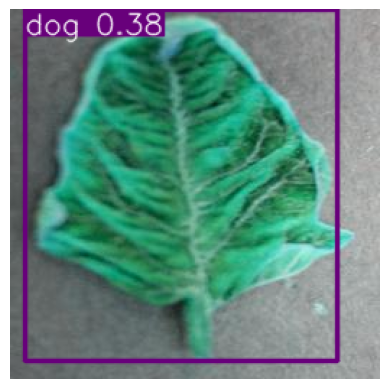

In [ ]:
#------------Run to view the prediction--------------
#----------------------------------------------------
#----------------------------------------------------


from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np

# Load the trained model

model = YOLO('/content/drive/MyDrive/plant_disease_detection/models/yolo_v8_nightshade_plant_disease_detection.pt')

# Load an image
image_path = '/content/drive/MyDrive/plant_disease_detection/dataset/test/TomatoYellowCurlVirus6.JPG'
image = plt.imread(image_path)

#  Make predictions
results = model(image_path)

# Visualize the results
# Plot the original image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

# Plot the image with predictions
plt.figure(figsize=(10, 10))
results_img = results[0].plot()
plt.imshow(results_img)
plt.axis('off')
plt.title('Image with Predictions')
plt.show()
